In [516]:
import numpy as np

In [517]:
import pandas as pd

In [518]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [519]:
house = pd.read_csv("C:/Users/KIIT/Downloads/nyc-property-sales/nyc-rolling-sales.csv")

In [520]:
house

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [521]:
house.drop(house.iloc[:,:1],axis=1,inplace=True)
house.drop('APARTMENT NUMBER',axis = 1,inplace=True)
del house['EASE-MENT']

In [522]:
house.shape

(84548, 19)

In [523]:
def clean(x,s):
    count = 0
    for i in range(48244):
        if (house.iloc[i,x] == s):
            count=count+1         
    print(count)

In [524]:
clean(6,0)

0


In [525]:
clean(10,0)

44772


In [526]:
clean(11,0)

13087


In [527]:
house.iloc[:,5].nunique()

2627

In [528]:
house['LAND SQUARE FEET'] = pd.to_numeric(house['LAND SQUARE FEET'], errors='coerce')
house['GROSS SQUARE FEET']= pd.to_numeric(house['GROSS SQUARE FEET'], errors='coerce')
house['SALE PRICE'] = pd.to_numeric(house['SALE PRICE'], errors='coerce')

house['TAX CLASS AT TIME OF SALE'] = house['TAX CLASS AT TIME OF SALE'].astype('category')
house['TAX CLASS AT PRESENT'] = house['TAX CLASS AT PRESENT'].astype('category')

house['SALE DATE'] = pd.to_datetime(house['SALE DATE'], errors='coerce')

In [529]:
house

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [530]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null category
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  58296 non-null float64
GROSS SQUARE FEET                 56936 non-null float64
YEAR BUILT                        84548 non-null int64
TAX CLASS AT TIME OF SALE         84548 non-null catego

In [531]:
house = house.drop_duplicates(house.columns, keep='last')
sum(house.duplicated(house.columns))

0

In [532]:
house.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,5.772900e+04,5.639800e+04,83783.000000,6.960700e+04
mean,2.999308,4242.903155,376.137415,10733.236575,1.999976,0.183677,2.213504,3.854481e+03,3.894416e+03,1789.814318,1.280703e+06
std,1.288668,3568.789482,658.021286,1289.764300,16.569118,8.576582,18.777727,4.154737e+04,3.483726e+04,536.565051,1.143036e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.643000e+03,1.040000e+03,1920.000000,2.300000e+05
50%,3.000000,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1940.000000,5.330000e+05
75%,4.000000,6295.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.552000e+03,1965.000000,9.500000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [637]:
house = house[house['SALE PRICE'].notnull()]
house = house[(house['SALE PRICE'] > 100000) & (house['SALE PRICE'] < 5000000)]
house = house[house['LAND SQUARE FEET'].notnull()] 
house = house[house['GROSS SQUARE FEET'].notnull()]

house = house[house['GROSS SQUARE FEET'] < 15000]
house = house[house['LAND SQUARE FEET'] < 15000]

house = house[(house['TOTAL UNITS'] > 0) & (house['TOTAL UNITS'] < 50)]
house = house[house['TOTAL UNITS'] == house['COMMERCIAL UNITS'] + house['RESIDENTIAL UNITS']]

house = house[house['YEAR BUILT'] > 0]

In [638]:
house.shape

(29537, 20)

In [639]:
house

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,104
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,97
172,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,107
174,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,183 AVENUE B,10009,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,107
195,1,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,118
222,1,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,116
223,1,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,10011,9,0,9,1566.0,6330.0,1901,2,C4,416790.0,2017-08-31,116
224,1,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,10011,9,0,9,1566.0,6330.0,1901,2,C4,630370.0,2017-08-31,116
233,1,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,790,63,C1,148 WEST 15TH STREET,10011,8,0,8,2000.0,4100.0,1910,2,C1,3485000.0,2016-12-05,107
277,1,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,C6,309 WEST 20TH STREET,10011,24,0,24,4600.0,12200.0,1850,2,C6,282000.0,2016-10-19,167


In [617]:
def rows():
    a = 57866
    i = 0
    while(i <= a):
        if house.iloc[i,12] == ' -  ' or house.iloc[i,13] == ' -  ' or house.iloc[i,17] == ' -  ' :
            house.drop(house.index[i], axis=0 , inplace=True)
            a = a-1
        i = i + 1
        print(i)


In [281]:
#house.reset_index(inplace=True)
#house.drop('index',axis=1,inplace=True)

In [295]:
#house.drop('level_0',axis=1,inplace=True)

In [304]:
#house['LAND SQUARE FEET']  = house['LAND SQUARE FEET'].astype(str).astype(np.int64)
#house['GROSS SQUARE FEET'] = house['GROSS SQUARE FEET'].astype(str).astype(np.int64)
#house['SALE PRICE'] = house['SALE PRICE'].astype(str).astype(np.int64)

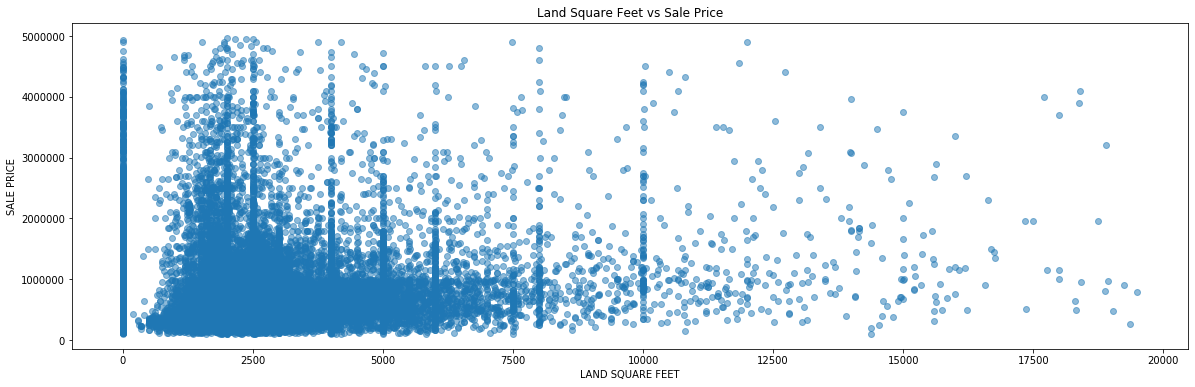

In [578]:
plt.figure(figsize=(20,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=house, fit_reg=False, scatter_kws={'alpha':0.5})
plt.title('Land Square Feet vs Sale Price')
plt.show()

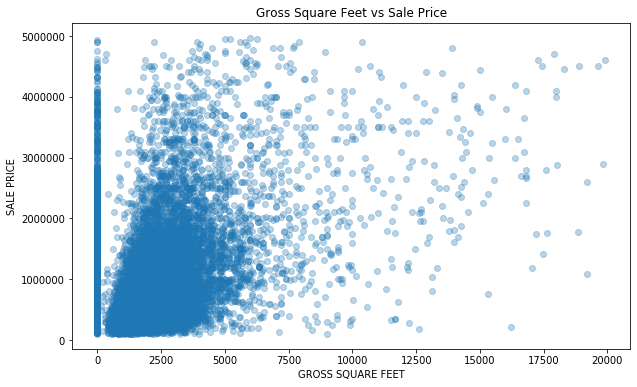

In [579]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data = house , fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

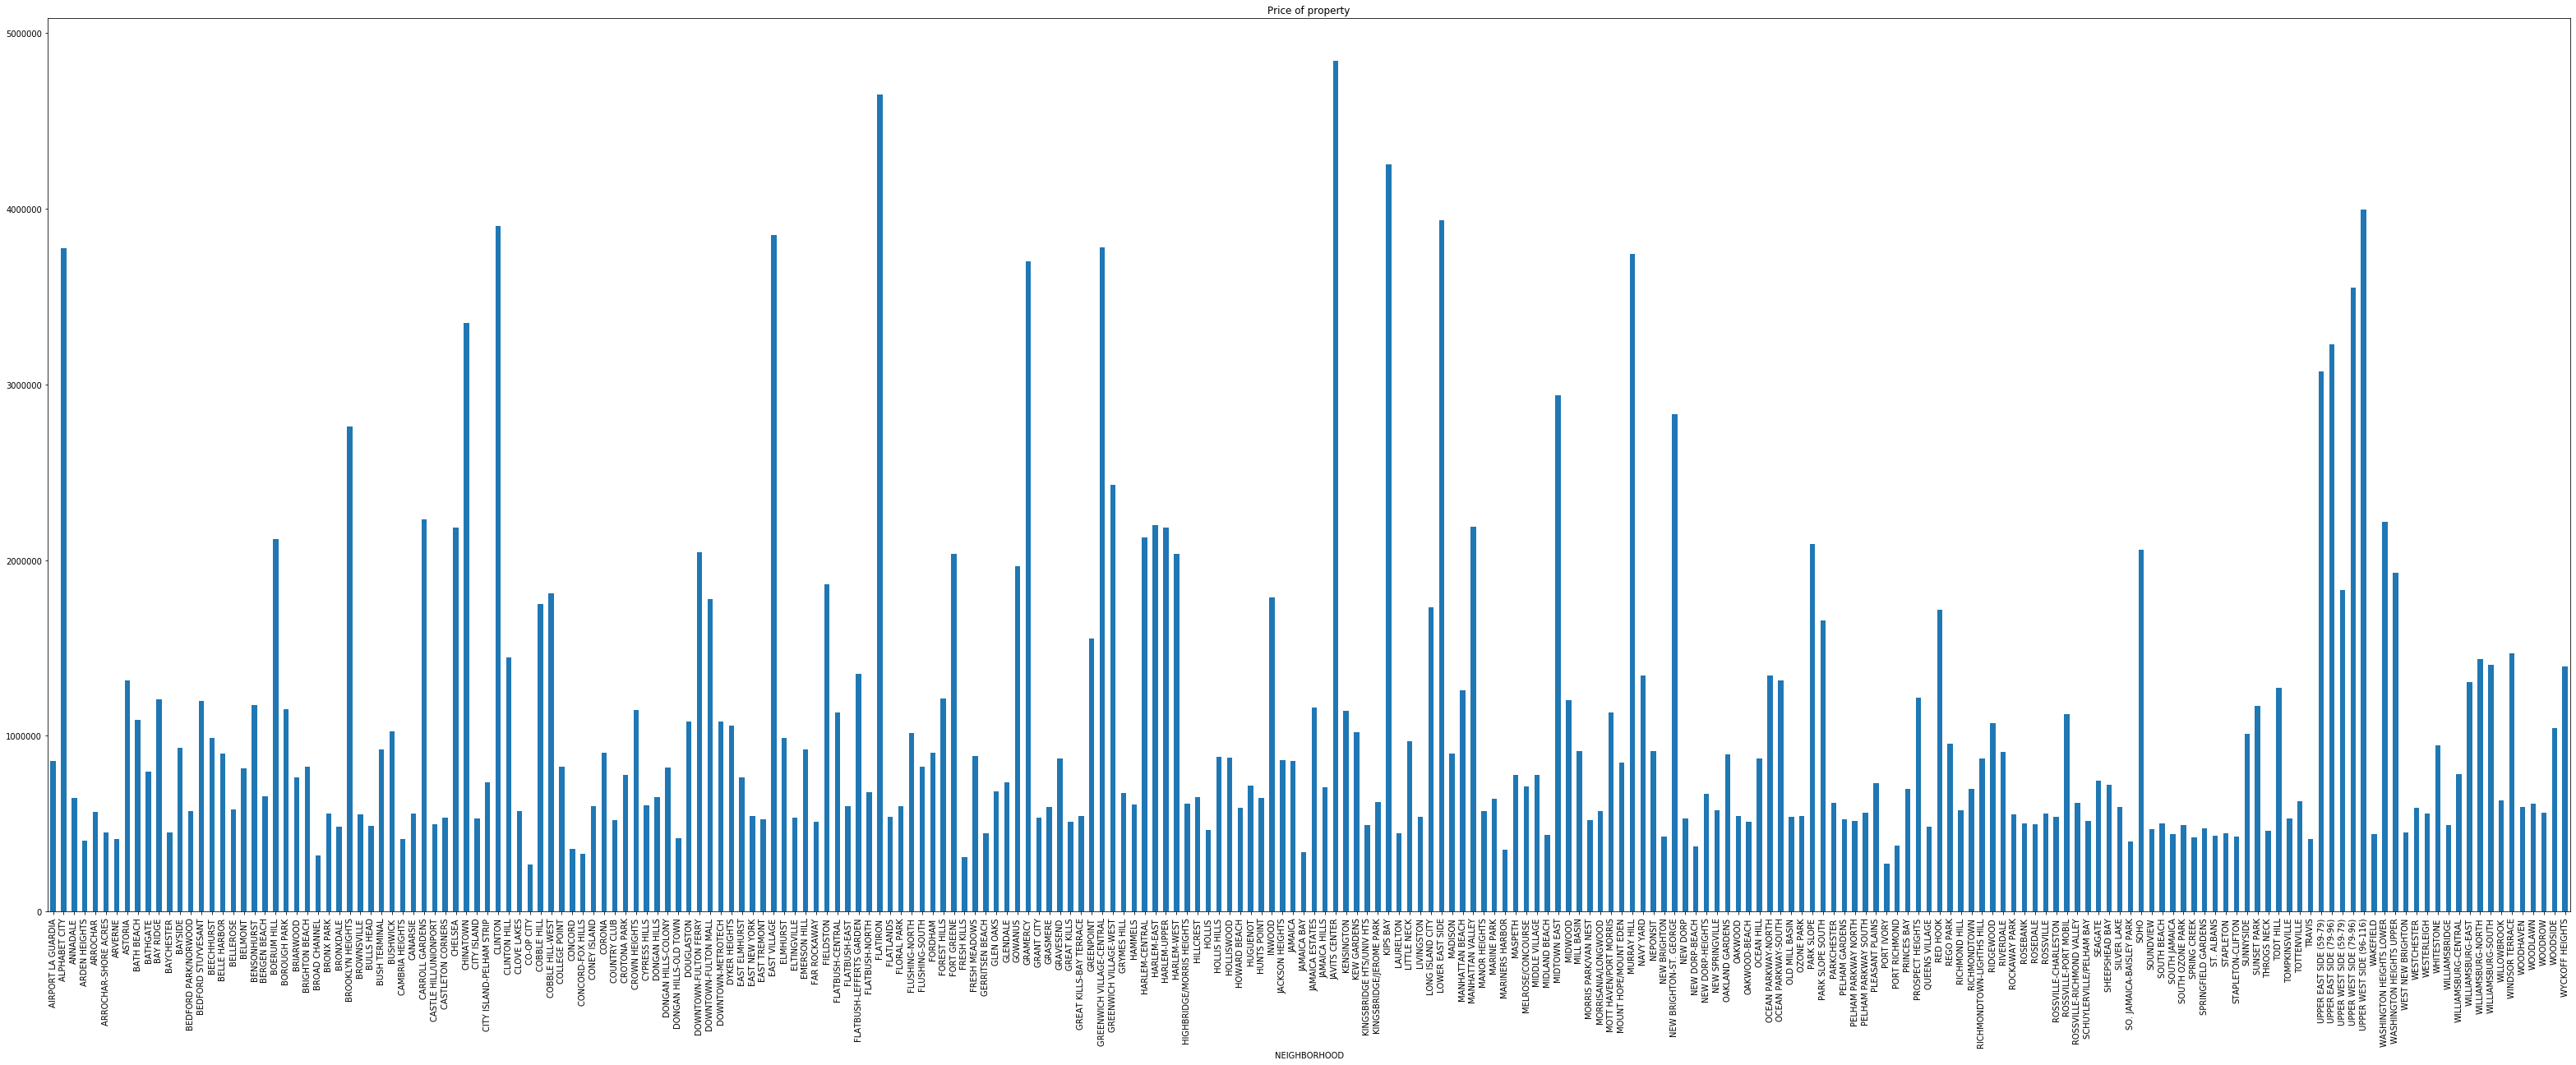

In [580]:
house.groupby('NEIGHBORHOOD').mean()['SALE PRICE'].plot(kind = "bar", figsize=(55,20) , title="Price of property")

In [540]:
#house.drop('BOROUGH',axis=1,inplace=True)

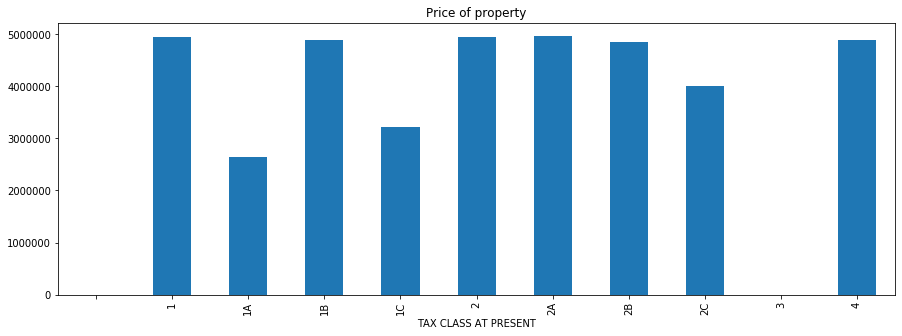

In [581]:
house.groupby('TAX CLASS AT PRESENT').max()['SALE PRICE'].plot(kind = "bar", figsize=(15,5) , title="Price of property")

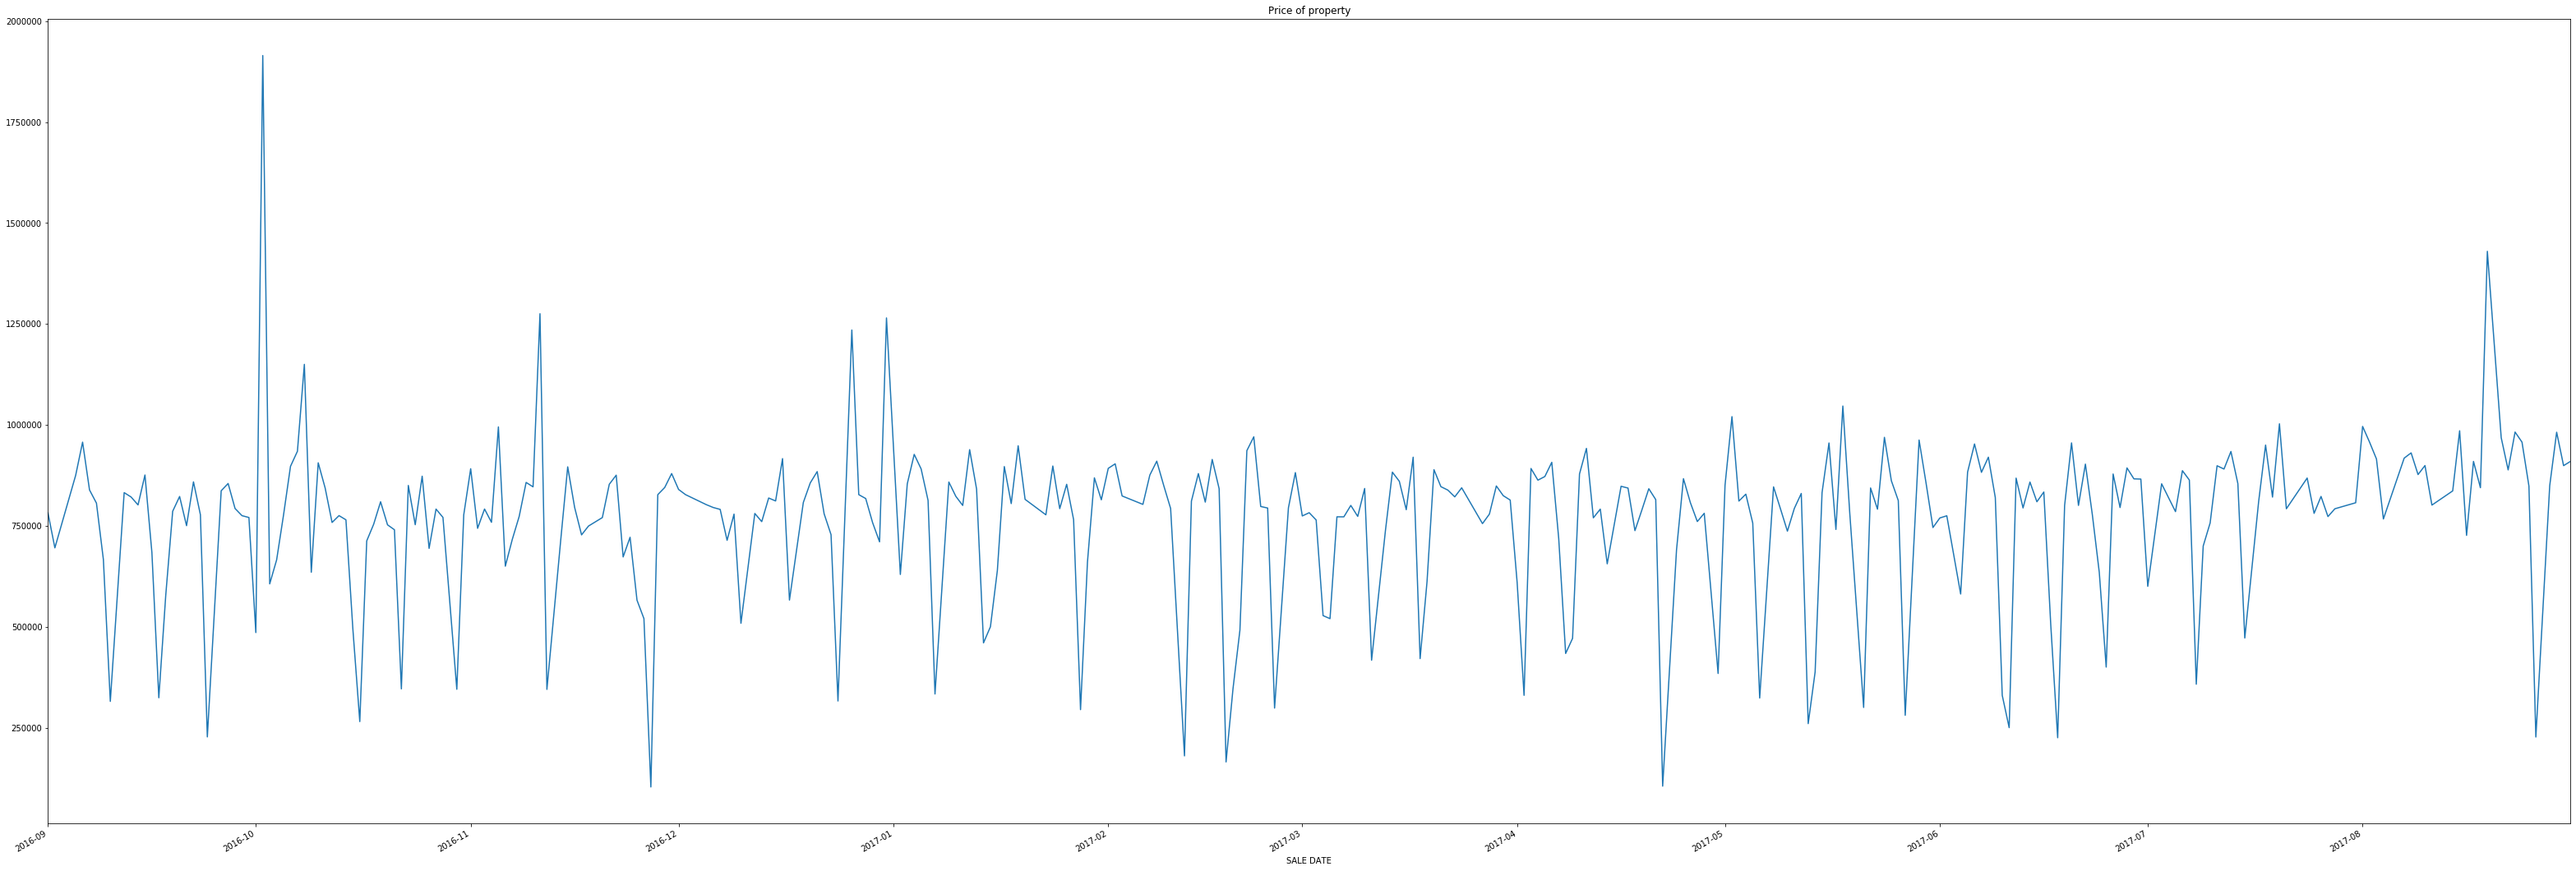

In [582]:
house.groupby('SALE DATE').mean()['SALE PRICE'].plot(kind = "line", figsize=(55,20) , title="Price of property")

In [640]:
house['BUILDING AGE'] = 2017-house['YEAR BUILT']

In [641]:
corr_matrix = house.corr()
corr_matrix["SALE PRICE"]

BOROUGH             -0.222300
BLOCK               -0.300466
LOT                  0.112542
ZIP CODE             0.127383
RESIDENTIAL UNITS    0.278593
COMMERCIAL UNITS     0.227662
TOTAL UNITS          0.332691
LAND SQUARE FEET     0.005492
GROSS SQUARE FEET    0.374038
YEAR BUILT          -0.061342
SALE PRICE           1.000000
BUILDING AGE         0.061342
Name: SALE PRICE, dtype: float64

In [642]:
columns = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','GROSS SQUARE FEET',
       'SALE PRICE', 'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS']
house_model = house.loc[:,columns]

one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY']

one_hot_encoded = pd.get_dummies(house_model[one_hot_features])

In [643]:
house_model = house_model.drop(one_hot_features, axis=1)


house_model = pd.concat([house_model, one_hot_encoded], axis=1)
house_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,...,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER
3,0,6794.0,3936272.0,104,2272.0,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,4226.0,3192840.0,97,1750.0,8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,1,3360.0,3300000.0,107,1520.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,1,3713.0,4750000.0,107,1779.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,1,3586.0,3700000.0,118,1218.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


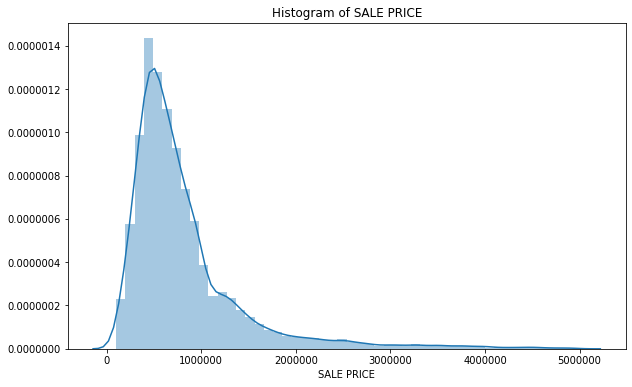

In [644]:
plt.figure(figsize=(10,6))
sns.distplot(house_model['SALE PRICE'])
plt.title('Histogram of SALE PRICE')
plt.show()

In [645]:
from sklearn.preprocessing import StandardScaler

house_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(house_model['SALE PRICE']).to_numpy().reshape(-1,1))


# Add 1 to Units
house_model['COMMERCIAL UNITS'] = house_model['COMMERCIAL UNITS'] + 1
house_model['RESIDENTIAL UNITS'] = house_model['RESIDENTIAL UNITS'] + 1
# The above step is done because there is no log of zero

# Take the log and standardise
house_model['COMMERCIAL UNITS'] = StandardScaler().fit_transform(np.log(house_model['COMMERCIAL UNITS']).to_numpy().reshape(-1,1))

house_model['RESIDENTIAL UNITS'] = StandardScaler().fit_transform(np.log(house_model['RESIDENTIAL UNITS']).to_numpy().reshape(-1,1))

# Add 1 to Units
house_model['GROSS SQUARE FEET'] = house_model['GROSS SQUARE FEET'] + 1
house_model['LAND SQUARE FEET'] = house_model['LAND SQUARE FEET'] + 1

# Take the log and standardise
house_model['GROSS SQUARE FEET'] = StandardScaler().fit_transform(np.log(house_model['GROSS SQUARE FEET']).to_numpy().reshape(-1,1))

house_model['LAND SQUARE FEET'] = StandardScaler().fit_transform(np.log(house_model['LAND SQUARE FEET']).to_numpy().reshape(-1,1))



In [646]:
# Add 1 to BUILDING AGE
house_model['BUILDING AGE'] = house_model['BUILDING AGE'] + 1

# Take the log and standardise
house_model['BUILDING AGE'] = StandardScaler().fit_transform(np.log(house_model['BUILDING AGE']).to_numpy().reshape(-1,1))

In [647]:
house_model.shape

(29537, 38)

In [648]:
corr_matrix = house_model.corr()
corr_matrix["SALE PRICE"]

COMMERCIAL UNITS                                                        0.200971
GROSS SQUARE FEET                                                      -0.053229
SALE PRICE                                                              1.000000
BUILDING AGE                                                           -0.053260
LAND SQUARE FEET                                                       -0.126582
RESIDENTIAL UNITS                                                       0.202494
BOROUGH                                                                -0.193520
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                        -0.299187
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                        -0.002134
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       0.094963
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                          -0.012343
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND                      0.016416
BUILDING CLASS CATEGORY_06 T

In [649]:
training, testing = train_test_split(house_model, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(house_model.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 29537; training sample size = 23629, testing sample size = 5908


In [650]:
df_train_s = training.loc[:,house_model.columns]
X_train = df_train_s.drop(['SALE PRICE'], axis=1)
Y_train = df_train_s.loc[:, ['SALE PRICE']]

df_test_s = testing.loc[:,house_model.columns]
X_test = df_test_s.drop(['SALE PRICE'], axis=1)
Y_test = df_test_s.loc[:, ['SALE PRICE']]

In [651]:
X_train

,COMMERCIAL UNITS,GROSS SQUARE FEET,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,...,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER
83817,-0.239109,0.337399,0.612324,0.516723,0.492760,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
34582,-0.239109,-2.854991,-3.013060,-2.884778,-0.645555,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79971,-0.239109,0.070305,-1.149849,0.231623,-0.645555,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52206,-0.239109,0.371965,0.439572,0.381355,-0.645555,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26646,-0.239109,0.672758,0.814222,0.195111,0.492760,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
72313,-0.239109,0.165380,0.612324,0.273010,-0.645555,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40830,-0.239109,-2.854991,-1.571483,-2.884778,-0.645555,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63033,-0.239109,0.443910,0.066882,0.498674,-0.645555,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53329,-0.239109,0.764767,0.500401,0.402544,2.871489,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23677,-0.239109,0.440748,-2.713906,0.150962,0.492760,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [652]:
X_test

,COMMERCIAL UNITS,GROSS SQUARE FEET,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,...,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER
36199,-0.239109,0.116731,-1.093626,0.152155,-0.645555,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21385,-0.239109,0.384233,-0.728215,0.190796,0.492760,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31643,-0.239109,0.318996,0.557867,0.307009,0.492760,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53201,-0.239109,0.172085,0.612324,0.216024,0.492760,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
56201,-0.239109,0.269154,0.439572,0.216024,-0.645555,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60276,-0.239109,0.149543,0.374963,0.173067,0.492760,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39109,3.109041,0.559860,0.488517,0.498674,-2.591517,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23471,-0.239109,0.281662,0.374963,0.338391,0.492760,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
44102,5.067583,0.398500,0.488517,0.237274,-2.591517,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49961,-0.239109,0.474626,0.557867,0.290363,0.492760,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [653]:
Y_train

,SALE PRICE
83817,-0.508333
34582,-1.567767
79971,-0.704479
52206,0.031936
26646,2.119742
72313,-0.664004
40830,1.369623
63033,-0.168161
53329,1.067932
23677,-1.058676


In [654]:
Y_test

,SALE PRICE
36199,-1.029851
21385,-1.666687
31643,0.953235
53201,-1.736206
56201,0.321452
60276,0.425855
39109,2.185258
23471,-0.719456
44102,0.291754
49961,0.078278


In [655]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [656]:
l.predict(X_test)

array([[-0.5422773 ],
       [ 0.00307807],
       [-0.04787562],
       ...,
       [-0.52536157],
       [-0.44515761],
       [-0.03296257]])

In [668]:
from sklearn.model_selection import cross_val_score
cv_scores_linreg = cross_val_score(l, X_train, Y_train, cv=2)
cv_scores_linreg

array([0.23065866, 0.19972635])

In [659]:
from sklearn.metrics import mean_squared_error
housing_predictions = l.predict(X_test)
mse = mean_squared_error(Y_test,housing_predictions)
rmse = np.sqrt(mse)
rmse

0.8702334701323461

In [660]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [661]:
from sklearn.ensemble import RandomForestRegressor

In [662]:
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [663]:
from sklearn.metrics import r2_score
Y_pred = forest.predict(X_test)
print(r2_score(Y_pred, Y_test))

0.026147833830479472


In [664]:
housing_predictions = tree_reg.predict(X_test)


In [665]:
tree_mse = mean_squared_error(Y_test,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.964214969433594

In [410]:
from sklearn.metrics import confusion_matrix

In [411]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
